# The Sparks Foundation Internship

<h2>Prediction using Unsupervised ML</h2>

<h3>By: Vishruth Raj V V</h3>

<h3>From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.</h3>

In [11]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans

In [5]:
#reading data from given .csv file
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Basic Data Exploration</h3>

In [6]:
#No of rows and Columns present 
data.shape

(150, 6)

In [7]:
#short description of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking for any Null variables 
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Basic Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In the given dataset we do not need to clean the data, the data appear to be good.

<h3>Finding the optimum number of clusters for K-Means</h3>

In [13]:
X=data.iloc[:,1:-1].values

Model is trained by taking cluster size in the range of 1-10.

In [15]:
error = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i).fit(X)
  error.append(kmean.inertia_)

The number where an elbow is formed is the optimal number of clusters.This is called the elbow method.

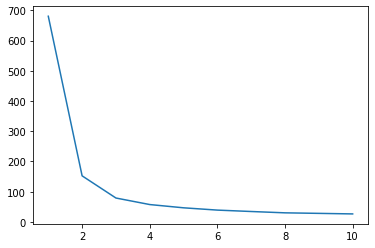

In [17]:
pyplot.plot(range(1,11),error)

<h3>Visualization</h3>

In [18]:
kmean3=KMeans(n_clusters=3)
y_kmean3 = kmean3.fit_predict(X)

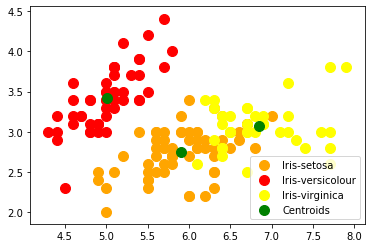

In [19]:
pyplot.scatter(X[y_kmean3 == 0, 0], X[y_kmean3 == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
pyplot.scatter(X[y_kmean3 == 1, 0], X[y_kmean3 == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
pyplot.scatter(X[y_kmean3 == 2, 0], X[y_kmean3 == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
pyplot.scatter(kmean3.cluster_centers_[:, 0], kmean3.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')
pyplot.legend()

*****************************************************************************